In [0]:
import fastai
from fastai import *
from fastai.vision import *  # 这里存放大部分关于CV的模块


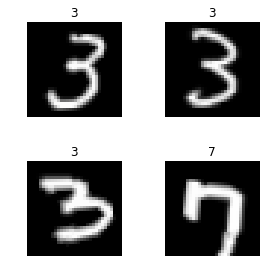

In [11]:
mnist = untar_data(URLs.MNIST_TINY)  # 该模块下载数据集到本地目录并返回路径
tfms = get_transforms(do_flip=False)  # 创建转换器但是不进行翻转（注意不是所有数据集都适合任何模式的增广，对手写数字，翻转意味着变为另一个数字）
# 利用ImageList从本地路径读入标准格式存放数据的数据集
data = (ImageList.from_folder(mnist)
        .split_by_folder()  # 按照数据集格式划分训练集测试集
        .label_from_folder()  # 从数据集路径获取标签
        .add_test_folder('test')  # 创建test目录
        .transform(tfms, size=32)  # 利用构建的转换器的得到处理后的图片数据，大小调整为32*32
        .databunch()  # 转为ImageDataBunch对象
        .normalize(imagenet_stats))  # 使用imagenet标准规范化数据

data.show_batch(rows=2, figsize=(4, 4))

In [12]:
model = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 84138274.61it/s]


In [13]:
model.fit(epochs=10, lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.579587,0.381521,0.918455,00:01
1,0.430785,0.321331,0.856938,00:01
2,0.345751,0.216156,0.922747,00:01
3,0.296118,0.161419,0.942775,00:01
4,0.249428,0.129882,0.957082,00:01
5,0.215657,0.124145,0.958512,00:01
6,0.188661,0.110216,0.967096,00:01
7,0.169607,0.094019,0.965665,00:02
8,0.151634,0.088576,0.969957,00:02
9,0.142129,0.075222,0.977110,00:01


In [0]:
model.export()

In [17]:
print(model.path)

/root/.fastai/data/mnist_tiny


In [18]:
!ls /root/.fastai/data/mnist_tiny

export.pkl  labels.csv	models	test  train  valid


In [0]:
learner = load_learner(mnist)  # or learner = load_learner(model.path)

In [20]:
img = data.train_ds[0][0]
print(model.predict(img))
print(learner.predict(img))

(Category 3, tensor(0), tensor([0.9973, 0.0027]))
(Category 3, tensor(0), tensor([0.9973, 0.0027]))


In [26]:
print(model.predict(data.train_ds[0][0]))
print(model.predict(data.train_ds[1][0]))

(Category 3, tensor(0), tensor([9.9990e-01, 9.5128e-05]))
(Category 3, tensor(0), tensor([0.9969, 0.0031]))


In [34]:
# 载入模型，指定测试数据
learner = load_learner(mnist, test=ImageList.from_folder(mnist/'test'))
preds, y = learner.get_preds(ds_type=DatasetType.Test)  # 指定数据集类型为测试集
print(preds[:10])
print(y[:10])

tensor([[9.9961e-01, 3.8995e-04],
        [9.9949e-01, 5.1475e-04],
        [8.4154e-03, 9.9158e-01],
        [2.9301e-04, 9.9971e-01],
        [1.6162e-05, 9.9998e-01],
        [9.9521e-01, 4.7919e-03],
        [9.9986e-01, 1.3508e-04],
        [4.2680e-03, 9.9573e-01],
        [9.7741e-01, 2.2594e-02],
        [9.9981e-01, 1.9486e-04]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
